<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## Exoplanet Transit Lightcurve
### About this notebook

In this worksheet we use the `astropy` package to read a .fits file from the exo.MAST database. We extract the light-curve information and visualize the data.

---

In this notebook we will use a .fits file from the exo.MAST database with the information of the lightcurve of the transit of an exoplanet. Go to the page 

[https://exo.mast.stsci.edu](https://exo.mast.stsci.edu)

Click on the `View Table of Exoplanets` link and search for the object **HAT-P-7_b**. 

Click on the `Kepler Light Curve` link (Top right of the page) and download the data file. 



Now, we will use the `astropy` package to read the .fits file. For a detalied description of working with .fits files using `astropy`, go to

http://docs.astropy.org/en/stable/io/fits/index.html


---

### Open and Close a .fits file

The first task is to read one of these files using the function `fits.open()` from the `astropy.io` package. The `open` function returns adn object called HDUList  and therefore it is assigned to the variable `hdul`. This is a list-like collecion of HDU (Header Data Unit) objects.

In [9]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
%matplotlib inline

In [10]:
hdul = fits.open('kplr010666592-20160128150956_dvt.fits')

The method `.info()` returns a summary of the content of the FITS file.

In [11]:
hdul.info()

Filename: kplr010666592-20160128150956_dvt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  TCE_1         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  TCE_4         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  5  TCE_5         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  6  TCE_6         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  7  TCE_7         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  8  Statistics    1 BinTableHDU    221   71427R x 50C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 

There can be many extensions dentoed by `hdul[0]`, `hdul[1]`, etc. The first one, `hdul[0]`, is called the PRIMARY extension. There is also another type of information as the number of cards and the dimensions of the data table.  

Since we open the file to extract and assign the information, it is recommendable to close the file:

In [12]:
hdul.close()

### Headers and Data

Each HDU object has a `.header` and a `.data` attributes. Using the method `header` of `astropy` it is possible to see the header of each HDU object. For example:

In [13]:
hdul[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   44 / length of first array dimension                
NAXIS2  =                71427 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

There is a lot of information about the data. For detailed information about the exo.MAST data you can click on the `View Docs` link next to the `Download Data` link in the object's page.

### Extracting the data from  the HDU object

The method `data` from `astropy` gives access to the data of each HDU object. For example, in the following command we will assign the data in the above FITS file to the variable lc_data. Note that we will read the HDU[1] object's data because there is where the light-curve information resides.

**Note: It is important to assign this information before closing the .fits file!**

In [15]:
hdul = fits.open('kplr010666592-20160128150956_dvt.fits')
lc_data = hdul[1].data
hdul.close()

The information is stored in a .FITS_rec format:

In [16]:
type(lc_data)

astropy.io.fits.fitsrec.FITS_rec

The shape of the array is easily obtained:

In [17]:
lc_data.shape

(71427,)

And we can take a peek on the information as

In [18]:
lc_data

FITS_rec([( 131.51205365, -0.00105983,  1105, 1.3335272, -3.9541512e-05, 2.5503115e-05, -0.34372607, -3.9541512e-05, 0., 0.10576324),
          ( 131.53248808, -0.00106056,  1106, 1.3539616, -2.2603195e-05, 2.5496436e-05,  0.02918476, -2.2603195e-05, 0., 0.20860007),
          ( 131.55292241, -0.00106129,  1107, 1.374396 , -3.5658915e-05, 2.5480678e-05, -0.11320674, -3.5658915e-05, 0., 0.30092743),
          ...,
          (1590.96039615, -0.00011113, 72529, 1.2497203, -6.9596713e-06, 2.5909627e-05, -0.29629543, -6.9596713e-06, 0., 0.34915897),
          (1590.98083036, -0.00011184, 72530, 1.2701546,  6.3239095e-05, 2.5841317e-05,  0.6172695 ,  6.3239095e-05, 0., 0.37782738),
          (1591.00126476, -0.00011254, 72531, 1.290589 ,  1.8839075e-04, 2.5825500e-05,  2.642254  ,  1.8839075e-04, 0., 0.40432364)],
         dtype=(numpy.record, [('TIME', '>f8'), ('TIMECORR', '>f4'), ('CADENCENO', '>i4'), ('PHASE', '>f4'), ('LC_INIT', '>f4'), ('LC_INIT_ERR', '>f4'), ('LC_WHITE', '>f4'), ('LC_D

Note that the final row contains the tags of each column.

The first row is obtained as

In [19]:
lc_data[0]

(131.51205364935595, -0.0010598294, 1105, 1.3335272, -3.954151e-05, 2.5503115e-05, -0.34372607, -3.954151e-05, 0.0, 0.10576324)

Now, we will extract the .FITS_rec information into a table using the `astropy.table.Table` function

In [20]:
from astropy.table import Table 

binarytable = Table(lc_data)
binarytable

TIME,TIMECORR,CADENCENO,PHASE,LC_INIT,LC_INIT_ERR,LC_WHITE,LC_DETREND,MODEL_INIT,MODEL_WHITE
float64,float32,int32,float32,float32,float32,float32,float32,float32,float32
131.51205364935595,-0.0010598294,1105,1.3335272,-3.954151e-05,2.5503115e-05,-0.34372607,-3.954151e-05,0.0,0.10576324
131.53248808165517,-0.0010605616,1106,1.3539616,-2.2603195e-05,2.5496436e-05,0.029184762,-2.2603195e-05,0.0,0.20860007
131.5529224139318,-0.0010612939,1107,1.374396,-3.5658915e-05,2.5480678e-05,-0.11320674,-3.5658915e-05,0.0,0.30092743
131.57335664615675,-0.0010620261,1108,1.3948301,-3.3626442e-05,2.5509618e-05,-0.043413952,-3.3626442e-05,0.0,0.37470224
131.59379097835335,-0.0010627584,1109,1.4152645,7.243876e-05,2.5514733e-05,1.6507578,7.243876e-05,0.0,0.42141774
131.6142254105216,-0.0010634905,1110,1.4356989,-1.9167643e-05,2.551281e-05,0.19305673,-1.9167643e-05,0.0,0.43312293
...,...,...,...,...,...,...,...,...,...
1590.8786588268922,-0.00010830689,72525,1.167983,-1.6757078e-05,2.5910123e-05,-0.2840508,-1.6757078e-05,0.0,0.2229695
1590.8990932329907,-0.00010901299,72526,1.1884174,-1.3110765e-05,2.59211e-05,-0.11579718,-1.3110765e-05,0.0,0.2549398


It is possible to access each of the columns by using its name,

In [21]:
binarytable['TIME']

131.51205364935595
131.53248808165517
131.5529224139318
131.57335664615675
131.59379097835335
131.6142254105216
131.63465964263742
131.6550939747176
131.67552840676944
...
1590.858224520889


### Visualizing the Image

We will use the `matplotlib.pyplot` package to visualize the light-curve data. First we will extract the relevant features:

**'TIME'**: : [float] The Barycentric Julian date of each cadence minus the offset 2454833. This value is available for all cadences in the file, even if no data is available at those times.

**'LC INIT'** : [float] The initial light curve discussed in the introduction. This light curve has been quarter-stitched, harmonic-removed and has a mean of zero

**LC WHITE** : [float] The whitened light curve that was searched by TPS to find this TCE. This is LC INIT after the whitening filter is applied.
 
**MODEL INIT** : [float] The transit model calculated for the initial light curve.
 
**MODEL WHITE** : [float] The whitened transit model calculated for the whitened light curve.


---

We will NOT calibrate the time in this notebook!! However, you can see this guide for a detailed description:

https://spacetelescope.github.io/notebooks/notebooks/MAST/Kepler/Kepler_Lightcurve/kepler_lightcurve.html

or the Kepler manual

https://archive.stsci.edu/kepler/manuals/archive_manual.pdf


In [22]:
time = binarytable['TIME']
lc_init = binarytable['LC_INIT']
lc_init_w = binarytable['LC_WHITE']
lc_model = binarytable['MODEL_INIT']
lc_model_w = binarytable['MODEL_WHITE']

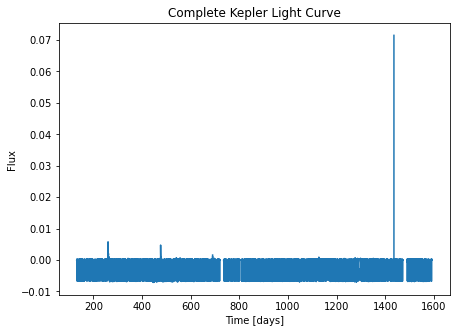

In [23]:
plt.figure(figsize=(7,5))
plt.plot(time, lc_init)
plt.title('Complete Kepler Light Curve')
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.show()

We will restrict to the first 200 days to plot the transit.

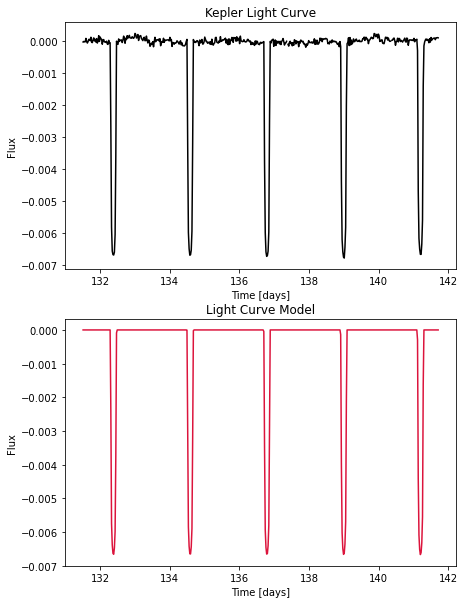

In [24]:
fig,ax = plt.subplots(2,1,figsize=(7,10))

# Plot the time, uncorrected and corrected fluxes.
ax[0].plot(time[0:500], lc_init[0:500], '-k') 
ax[0].set_title('Kepler Light Curve')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')

ax[1].plot(time[0:500], lc_model[0:500], color='crimson') 
ax[1].set_title('Light Curve Model')

ax[1].set_xlabel('Time [days]')
ax[1].set_ylabel('Flux')
plt.show()

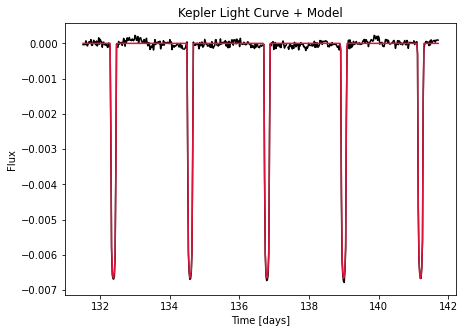

In [25]:
plt.figure(figsize=(7,5))
plt.plot(time[0:500], lc_init[0:500], color='black') 
plt.plot(time[0:500], lc_model[0:500], color='crimson') 
plt.title('Kepler Light Curve + Model')
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.show()